In [1]:
from exod.processing.detector import Detector, plot_var_with_regions
from exod.pre_processing.data_loader import DataLoader
from exod.utils.path import save_df
from exod.xmm.observation import Observation
from exod.processing.detector import Detector
from exod.utils.logger import logger
from photutils.detection import daofinder, irafstarfinder, starfinder

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils.aperture import CircularAperture
from astropy.stats import sigma_clipped_stats

In [3]:

# Create the Observation class
obsid = '0872390901'

obsid         = obsid
size_arcsec   = 20.0
time_interval = 5
gti_only      = True
gti_threshold = 0.5
min_energy    = 0.5
max_energy    = 12.0
sigma         = 4
clobber       = False

observation = Observation(obsid)
observation.get_files()

# Get the eventslist & image to use
event_list = observation.events_processed_pn[0]
event_list.read()

img = observation.images[0]
img.read(wcs_only=True)

# Initialize the Data Loader
dl = DataLoader(event_list=event_list,
                size_arcsec=size_arcsec,
                time_interval=time_interval,
                gti_only=gti_only,
                gti_threshold=gti_threshold,
                min_energy=min_energy,
                max_energy=max_energy)
dl.run()


## Add Bursts
#cube_with_peak = cube + create_fake_Nbins_burst(dl.data_cube, x_pos=25, y_pos=25,
#                                                time_peak_fractions=(0.3,0.4,0.6,0.8), amplitude=40)
#
#precompute_bayes_limits(threshold=threshold)
#
#estimated_cube = compute_expected_cube_using_templates(cube_with_peak, rejected)
#dc = DataCube(data=estimated_cube)
#dc.video()

2024-03-06 11:55:05,523 - INFO - event_list.py:remove_bad_rows - Removing Bad PN Rows Struder et al. 2001b
2024-03-06 11:55:05,579 - INFO - event_list.py:remove_borders - Removing Borders: EPN PrimeLargeWindow
2024-03-06 11:55:05,765 - INFO - data_loader.py:get_high_energy_lc - min_energy_he = 10.0 max_energy_he = 12.0 time_interval_gti = 100
2024-03-06 11:55:05,776 - INFO - bti.py:get_bti - Curve Ended Above threshold! (but did not start above it)
2024-03-06 11:55:05,777 - INFO - event_list.py:filter_by_energy - Filtering Events list by energy min_energy=0.5 max_energy=12.0
2024-03-06 11:55:05,814 - INFO - data_loader.py:create_data_cube - Creating Data Cube...
2024-03-06 11:55:11,327 - INFO - data_cube.py:crop_data_cube - Cropping data cube between bbox_img: (28, 114, 19, 106)
2024-03-06 11:55:11,329 - INFO - data_loader.py:mask_bti_from_data_cube - Masking bad frames from Data Cube (setting to nan)


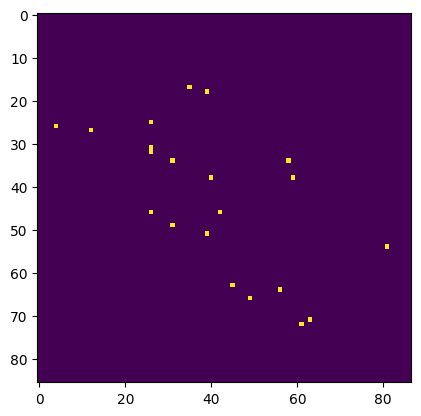

In [7]:
plt.imshow(dl.data_cube.data[:,:,216])

In [10]:
dl.event_list.data

TIME,RAWX,RAWY,DETX,DETY,X,Y,PHA,PI,FLAG,PATTERN,PAT_ID,PAT_SEQ,CCDNR,TIME_RAW
float64,int16,int16,int16,int16,int32,int32,int16,int16,int32,uint8,int16,uint8,uint8,float64
724660780.5458338,15,164,-3488,1961,27216,28069,1698,8685,0,0,0,0,1,724660780.5347857
724660784.9962333,38,123,-5320,5371,25975,31735,1226,6437,0,0,0,0,1,724660785.0151776
724660787.3055482,50,161,-6330,2225,28963,30326,114,1092,0,1,5121,0,1,724660787.3030311
724660789.6974972,14,179,-3388,675,28087,27118,1089,5630,0,0,0,0,1,724660789.6862227
724660794.2749435,44,173,-5866,1172,29416,29268,1423,7798,0,0,0,0,1,724660794.2619501
724660795.707754,28,184,-4532,269,29165,27676,858,5406,0,3,5121,1,1,724660795.6918656
724660800.8189379,14,184,-3347,326,28314,26849,176,940,0,0,0,0,1,724660800.8395474
724660801.3688123,8,197,-2900,-753,28797,25786,73,659,0,2,5121,0,1,724660801.3638418
724660805.9094331,22,153,-3999,2898,26880,29082,915,5377,0,1,5121,0,1,724660805.8918937


In [3]:
detector.df_regions

,label,bbox-0,bbox-1,bbox-2,bbox-3,centroid-0,centroid-1,weighted_centroid-0,weighted_centroid-1,intensity_mean,equivalent_diameter_area,area_bbox,x_img,y_img,X,Y,ra,dec,ra_deg,dec_deg
0,0,30,95,32,99,30.571429,96.285714,30.628766,96.264338,88.407581,2.985411,8.0,176.708264,400.970236,14136.661090358555,32077.61887994265,17h51m37.21s,-27d59m01.30s,267.905037,-27.983694
1,1,158,96,160,99,158.250000,97.000000,158.317322,96.897064,44.800837,2.256758,6.0,496.176157,402.553272,39694.09258550233,32204.26176307942,17h50m00.74s,-27d58m54.80s,267.503081,-27.981888
2,2,72,68,73,69,72.000000,68.000000,72.000000,68.000000,15.292203,1.128379,1.0,280.216216,330.254826,22417.297297297297,26420.3861003861,17h51m05.96s,-28d03m44.57s,267.774842,-28.062380


In [4]:
from scipy.interpolate import interp1d

In [5]:
?interp1d

Init signature:
interp1d(
    x,
    y,
    kind='linear',
    axis=-1,
    copy=True,
    bounds_error=None,
    fill_value=nan,
    assume_sorted=False,
)
Docstring:     
Interpolate a 1-D function.

.. legacy:: class

`x` and `y` are arrays of values used to approximate some function f:
``y = f(x)``. This class returns a function whose call method uses
interpolation to find the value of new points.

Parameters
----------
x : (npoints, ) array_like
    A 1-D array of real values.
y : (..., npoints, ...) array_like
    A N-D array of real values. The length of `y` along the interpolation
    axis must be equal to the length of `x`. Use the ``axis`` parameter
    to select correct axis. Unlike other interpolators, the default
    interpolation axis is the last axis of `y`.
kind : str or int, optional
    Specifies the kind of interpolation as a string or as an integer
    specifying the order of the spline interpolator to use.
    The string has to be one of 'linear', 'nearest', 'neare

In [6]:
tab

NameError: name 'tab' is not defined

In [ ]:
for i, row in detector.df_regions.iterrows():
    xlo, xhi = row['bbox-0']*80, row['bbox-2']*80
    ylo, yhi = row['bbox-1']*80, row['bbox-3']*80
    
    print(xlo, xhi, ylo, yhi)
    
    tab = event_list.data
    print(tab)
    tab = tab[(tab['X'] >= xlo) & (tab['X'] <= xhi)]
    print(tab)
    tab = tab[(tab['Y'] >= ylo) & (tab['Y'] <= yhi)]
    print(tab)








In [ ]:
data_cube = dl.data_cube

In [ ]:
len(data_cube.bin_x)

In [ ]:
data_cube.bin_x

In [ ]:
# Get the Events corresponding to the region.

# Get the X, Y sky coordinates of the region.
region gives the position on the cube
we need to convert this to the X,Y positions

interpX = interp1d(range(len(data_cube.bin_x)), data_cube.bin_x / 80)
interpY = interp1d(range(len(data_cube.bin_y)), data_cube.bin_y / 80)














In [ ]:
class RegionCollection:
    def __init__(self, regions):
        self.regions = regions

    def from_df_regions(cls, df_regions):
        regions = []
        
        return cls(regions)

In [ ]:
class Region:
    def __init__(self, id, X, Y, bbox):
        self.id = id 
        self.X = X
        self.Y = Y
        self.bbox = bbox

        self.event_list = event_list
        self.data_cube  = data_cube
        
    @classmethod
    def from_df_regions(cls, df_regions):
        df_regions['label']
        cls()
        return cls()
    
    def extract_lc(data_cube):
        data_cube.
        return 

    def get_events(self, event_list):
        return table

    def calc_KS(self):
        

    @property
    def info(self)
        info = {}
        return info

In [ ]:
class Source:
    def __init__(self, id, X, Y):
        self.id = id
        self.X = X
        self.Y = Y
        
    def __repr__(self):
        return f'Source(id={self.id} X={self.X:.3f}, Y={self.Y:.3f})'

    @classmethod
    def from_dao(cls, row):
        """Create Source from row in daofinder.DAOStarFinder result table."""
        s = cls(row['id'], row['xcentroid'], row['ycentroid'])
        s.sharpness  = row['sharpness']
        s.roundness1 = row['roundness1']
        s.roundness2 = row['roundness2']
        s.npix       = row['npix']
        s.sky        = row['sky']
        s.peak       = row['peak']
        s.flux       = row['flux']
        s.mag        = row['mag']
        return s

    @classmethod
    def from_peaks(cls, row):
        """Create Source from row in daofinder.DAOStarFinder result table."""
        pass
        
    @property
    def info(self):
        info = {'id' : self.id,
                'X'  : self.X,
                'Y'  : self.Y}
        return info

class SourceCollection:
    def __init__(self):
        self.sources = []

    def add_source(self, source):
        self.sources.append(source)
        
    def to_df():
        return pd.DataFrame([s.info for s in self.sources])

    def to_table():
        tab = []
        return tab


class Detector:
    def __init__(self, data_cube):
        self.data_cube = data_cube
        self.image_max = np.nanmax(self.data_cube.data, axis=2)
        self.image_std = np.nanstd(self.data_cube.data, axis=2)
        self.image_sum = np.nansum(self.data_cube.data, axis=2)
        self.image_var = self.image_max * self.image_std

        # Masking Bright Sources
        self.image_mask = None
        self.mask_percentile = None
        self.mask_percentile_val = None

        # Sigma Clipping For Background Estimation
        self.sigma_clip = 3.0          # Sigmas for background Estimation
        self.var_sigma_threshold = 6.0 # Sigmas for source Extraction
        self.var_mean_sc, self.var_median_sc, self.var_std_sc = self.calc_sigma_clipped_stats()

        # Detection Thresholds for DAO star finder
        self.threshold_dao = self.calc_detection_threshold()
        self.fwhm_dao      = 1.5

        # Detected Sources
        self.sources = []
    
    def __repr__(self):
        return f'Detector({data_cube})'

    def mask_bright_sources(self, percentile=99.97):
        """Mask Bright Sources by sum image."""
        self.mask_percentile = percentile
        self.mask_percentile_val = np.percentile(self.image_sum, self.mask_percentile)
        self.image_mask  = self.image_sum > self.mask_percentile

    def calc_sigma_clipped_stats(self):
        """Calculate the sigma clipped statistics for the variability image."""
        mean, median, std = sigma_clipped_stats(self.image_var, sigma=self.sigma_clip)
        logger.info(f'mean={mean:.2f} median={median:.2f} std={std:.2f}')
        return mean, median, std
        
    def calc_detection_threshold(self):
        """Calculate the Detection threshold."""
        threshold = self.var_mean_sc + (self.var_sigma_threshold * self.var_std_sc)
        logger.info(f'threshold={threshold:.2f}')
        return threshold
    
    def detect_dao(self, fwhm=1.0, **kwargs):
        """Detect Sources in variability image using DAO starfinder."""
        sf = daofinder.DAOStarFinder(threshold=self.threshold_dao, fwhm=fwhm, exclude_border=True,)
        self.tab_dao = sf.find_stars(self.image_var, mask=self.image_mask, **kwargs)
        if self.tab_dao:
            self.sources = [Source.from_dao(r) for r in self.tab_dao]
        else:
            logger.info('No Sources Found!')

    def plot_image_mask(self):
        plt.figure(figsize=(6,6))
        plt.title(f'Image mask | percentile={self.mask_percentile} | value={self.mask_percentile_val:.2f}')
        plt.imshow(self.image_mask, interpolation='none', cmap='grey')
        plt.show()
        
    def plot_image_var(self, savepath=None):
        logger.info('Plotting Variability map with source regions')
    
        # Colors and Normalisation
        cmap = plt.cm.hot
        cmap.set_bad('black')
        norm = ImageNormalize(stretch=SqrtStretch()) #LogNorm()
    
        # Plot Image
        fig, ax = plt.subplots(figsize=(10,10))
        m1 = ax.imshow(self.image_var, norm=norm, interpolation='none', origin='lower', cmap=cmap)
        cbar = plt.colorbar(mappable=m1, ax=ax, shrink=0.75)
        cbar.set_label("Variability")

        # Plot Sources
        source_color = 'lime'
        Xs = [s.X for s in self.sources]
        Ys = [s.Y for s in self.sources]

        apertures = CircularAperture(np.transpose((Xs, Ys)), r=3.0)
        
        plt.scatter(Xs, Ys, marker='.', s=10, color=source_color)
        apertures.plot(color=source_color, lw=1.0, alpha=0.5, ax=ax)
        
        for s in self.sources:
            offset = 2
            plt.text(s.X+offset, s.Y+offset, str(s.id), c=source_color)
        plt.tight_layout()
        
        if savepath:
            logger.info(f'Saving Variability image to: {savepath}')
            plt.savefig(savepath)

    def plot_3d_image(self, image):
        xx, yy = np.mgrid[0:image.shape[0], 0:image.shape[1]]
        fig = plt.figure(figsize=(15, 15))
        ax = fig.add_subplot(projection='3d')
        ax.plot_surface(xx, yy, image , rstride=1, cstride=1, cmap='plasma', linewidth=0) # , antialiased=False
        
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        #ax.set_zticks([])
        
        plt.show()
    
    
    def detect_skimage(self):
        """Detect Sources in variability image using skimage label."""
        pass

    def sources_to_df(self):
        return pd.DataFrame([s.info for s in self.sources])

    @property
    def n_sources(self):
        return len(self.sources)
        
    @property
    def info(self):
        info = {'data_cube'             : self.data_cube,
                'n_sources'             : self.n_sources,
                'mask_percentile'       : self.mask_percentile,
                'mask_percentile_val'   : self.mask_percentile_val,
                'threshold_dao'         : self.threshold_dao,
                'fwhm_dao'              : self.fwhm_dao}
        for k, v in info.items():
            logger.info(f'{k:>21} : {v}')
        return info
    


In [ ]:
detector = Detector(data_cube=dl.data_cube)
detector.plot_3d_image(detector.image_var)

In [ ]:
detector = Detector(data_cube=dl.data_cube)
#detector.mask_bright_sources(percentile=99.99997)
#detector.plot_image_mask()
detector.detect_dao(fwhm=0.5)
detector.plot_image_var()
detector.plot_3d_image(detector.image_var)

df = detector.sources_to_df()
print(df)
det_info = detector.info

In [ ]:
a   = detector.image_sum
arr = sigma_clip(a, sigma=50, maxiters=5, masked=True)
plt.imshow(arr)




#a = a[a>0]
#a_log = np.log10(a)
#v = np.percentile(a_log, 99.97)
#val = 10**v
#print(val)
#plt.figure(figsize=(4,3))
#plt.axvline(v, color='red')
#plt.hist(a_log, bins=100)
#plt.xlabel('log10(sum image)')
#plt.ylabel('Count')
#plt.show()

In [ ]:
detector.

In [ ]:
from photutils.detection import find_peaks

In [ ]:
tab_peaks

In [ ]:
img_mask.shape

In [ ]:
img_sum   = np.nansum(data_cube.data, axis=2)
img_mask  = img_sum > np.percentile(img_sum, 99.97)
tab_peaks = find_peaks(var_img, threshold=1.0, box_size=3, mask=img_mask)
tab_peaks

fig, ax = plt.subplots(figsize=(10,10))
imshow = ax.imshow(var_img, cmap='hot', origin='lower', norm=norm, interpolation='none')
plt.scatter(tab_peaks['x_peak'], tab_peaks['y_peak'], color='lime', marker='.', s=10)
plt.tight_layout()
plt.show()

In [ ]:
from astropy.stats import sigma_clipped_stats


mean, median, stddev = sigma_clipped_stats(var_img)
mean, median, stddev

In [ ]:
sources

In [ ]:
import astropy.wcs as wcs

In [ ]:
wcs.i